# 5.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('EICHERMOT.CSV')

df = df[df.Series=='EQ']
df = df.reset_index()
df = df.drop(columns='index')

df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,EICHERMOT,EQ,15-May-2017,29178.35,29403.10,29455.00,28831.00,28915.05,28930.60,29015.64,20026,5.810673e+08,8495,8193,40.91
1,EICHERMOT,EQ,16-May-2017,28930.60,28920.45,29450.00,28820.00,29365.95,29362.50,29107.91,36189,1.053386e+09,11584,16359,45.20
2,EICHERMOT,EQ,17-May-2017,29362.50,29262.00,29300.00,28971.35,28982.05,29093.55,29116.26,18545,5.399610e+08,7918,10611,57.22
3,EICHERMOT,EQ,18-May-2017,29093.55,28900.00,28998.85,28213.00,28213.00,28357.30,28521.49,30153,8.600085e+08,11283,15761,52.27
4,EICHERMOT,EQ,19-May-2017,28357.30,28698.00,28698.00,27756.00,27915.00,27936.05,28024.04,44251,1.240092e+09,21721,20153,45.54


Calculating the mean daily return of the stock

In [3]:
rd = pd.Series(df['Close Price']).pct_change()
mdr = rd.mean()
mdr

-0.0007003338366123908

Calculating the standard deviation of the percentage change of returns

In [4]:
rst= rd.std()
rst

0.018909798917251183

The annual mean and annual std return

In [5]:
am = 252*mdr
astd = (252**0.5) * rst

# 5.2

In [6]:
dfl = []

dfl.append(pd.read_csv('Mid_Cap\APOLLOTYRE.csv'))
dfl.append(pd.read_csv('Mid_Cap\CASTROLIND.csv'))
dfl.append(pd.read_csv('Mid_Cap\AMARAJABAT.csv'))
dfl.append(pd.read_csv('Mid_Cap\TATAPOWER.csv'))
dfl.append(pd.read_csv('Mid_Cap\EXIDEIND.csv'))

In [7]:
for i in range(0,5):
    dfl[i] = dfl[i][dfl[i].Series=='EQ']

In [8]:
for i in range(0,5):
    dfl[i] = dfl[i].reset_index()
    dfl[i] = dfl[i].drop(columns='index')

We've created a list of dataframes of 5 different stocks using which we will build our portfolio.

S will contain the percentage changes of the closing price of the stocks we took above

In [9]:
S = np.zeros((len(df),5)) 

for i in range(0,5):
    S[:,i] = pd.Series(dfl[i]['Close Price']).pct_change()
S = np.delete(S, (0), axis=0)

S

array([[ 0.01078051, -0.0152273 , -0.00932076,  0.00359066, -0.00447518],
       [ 0.01258532, -0.00778781,  0.01405861,  0.01788909, -0.00612996],
       [-0.01980198, -0.0127403 , -0.02730084, -0.01874634, -0.01377467],
       ...,
       [-0.03363755, -0.02101401, -0.00070755, -0.00155039,  0.00695944],
       [ 0.0304911 , -0.00170358, -0.00102274, -0.00931677,  0.00190658],
       [-0.02487562, -0.01433447, -0.01425421, -0.01880878, -0.0114177 ]])

M will store the means of the values computed above for all stocks

In [10]:
M = np.zeros(5)
for i in range(0,5):
    M[i]=S[:,i].mean()
M

array([-0.00025517, -0.00175352, -0.00066926, -0.00039906, -0.0002043 ])

Demeaning the prices

In [11]:
S = S-M

Taking the transpose of the above matrix

In [12]:
ST= S.T

This is our covariance matrix

In [13]:
C = ST.dot(S)

Creating a weight distribution matrix W with all the stocks having equal weight(0.2)

In [14]:
W = np.zeros(5)
for i in range(0,5):
    W[i]=0.2

Expected portfolio return

In [15]:
EPR = M.dot(W)
EPR

-0.0006562625255936058

Expected portfolio variance

In [16]:
EPV = (W.T).dot(C).dot(W)
EPV

0.0805130297109696

### Volatilty of the portfolio is as shown below

In [17]:
volatility = EPV**0.5
volatility

0.28374818010159925

Now the weights have to be random so we will generate about 2000 random numbers (they will be having a sum across the row to be 1 since the total weight is 1)

In [18]:
np.random.seed(0)

n = 5
# Randomize a Numpy Array with 500 x n array
rand_nos = np.random.rand(2000, n)

In [19]:
sumrow = np.sum(rand_nos,axis=1)

Wr will contain the list of random weights of each stock

In [20]:
Wr = (2000,5)
Wr=np.zeros(Wr)
for j in range(0,len(rand_nos)):
    for i in range(0,5):
        Wr[j][i]=rand_nos[j][i]/sumrow[j]

Creating the correspondin lists of Expected returns and variances of the stock

In [21]:
EPRn = []
EPVn= []
for i in range(0,len(rand_nos)):
    EPRn.append(M.dot(Wr[i])*100)
    EPVn.append(((Wr[i].T).dot(C).dot(Wr[i]))**0.5)

A scatter plot for the list of values we obtained above. 
Two points are denoted in the plot:

Red marker - denotes the point of higest volatility

Yellow marker - denotes the where the Sharpe ratio is the highest

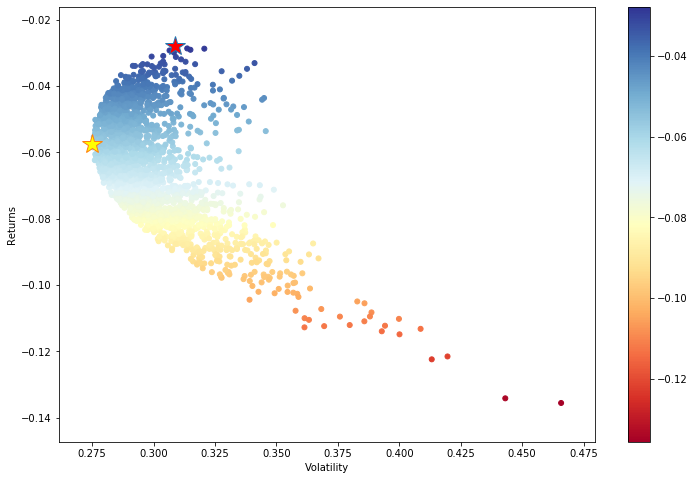

In [22]:
figure(figsize=(12, 8))


ax = plt.scatter(EPVn,EPRn,c=EPRn, cmap="RdYlBu", s=25)
plt.colorbar(ax)

plt.plot(EPVn[np.argmax(EPRn)],max(EPRn), '*',markersize=20, markerfacecolor='red')
plt.plot(min(EPVn),EPRn[np.argmin(EPVn)], '*',markersize=20, markerfacecolor='yellow',linewidth=2)

plt.xlabel("Volatility")
plt.ylabel("Returns")

plt.show()